## L'égalité homme/femme au sein de la SNCF

Intéressons nous maintenant à la place des femmes dans l'effectif de la SNCF.
Sont-elles bien représentées ? Existe t-il des postes discriminants pour les femmes ?

Voici le tableau que nous allons utiliser pour cette étude :

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
T=pd.read_csv('repartition-genre-effectif.csv', sep=";") #Je rends le tableau lisible 
print(T)

    Date                 Contrat de travail  Nombre d'hommes  Nombre de femmes
0   2010  Agents contractuels temps complet           3420.0            2341.0
1   2010  Agents contractuels temps partiel            577.0            1478.0
2   2010                  Cadres supérieurs           1187.0             279.0
3   2013                   Agents au statut         115402.0           26199.0
4   2013  Agents contractuels temps complet           7053.0            3487.0
5   2013  Agents contractuels temps partiel            525.0            1362.0
6   2014                  Cadres supérieurs           1171.0             330.0
7   2015                   Agents au statut         110377.0           25620.0
8   2016  Agents contractuels temps complet           9440.0            3703.0
9   2016  Agents contractuels temps partiel            447.0            1107.0
10  2017                   Agents au statut         104556.0           24972.0
11  2018                   Agents au statut         

Le tableau explicite par année et par type de poste l'effectif masculin et féminin.
Cependant pour les années 2020 et 2021 il manque certains postes, nous allons donc, par soucis de cohérence "écarter" ces années pour réaliser notre étude.

In [3]:
Tn=T.loc[(T['Date']!=2020)&(T['Date']!=2021)] #création d'un nouveau tableau sans ces années

### a) Evolution du pourcentage de nombre de femmes 

Dans un premier temps, nous allons réaliser une étude générale dans laquelle nous allons représenter la proportion de femme au sein de l'entreprise en fonction de l'année. 

On crée un groupby par date et on réalise un simple calcul de proportion.

In [8]:

bydate=Tn.groupby(by='Date')
proportion_femmes_date=bydate["Nombre de femmes"].sum()/(bydate["Nombre de femmes"].sum() + bydate["Nombre d'hommes"].sum())*100

On trace alors l'évolution du pourcentage du nombre de femmes 

Text(0, 0.5, 'Proportion')

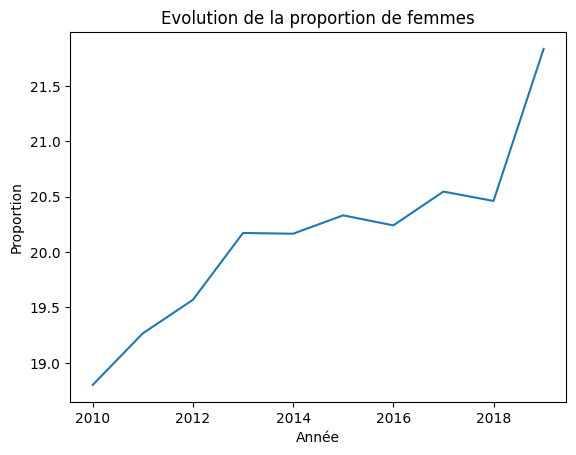

In [9]:
plt.plot(proportion_femmes_date.index, proportion_femmes_date)
plt.title("Evolution de la proportion de femmes")
plt.xlabel("Année")
plt.ylabel("Proportion")

La proportion de femmes au sein de la sncf augmente chaque année : c'est cool

### b) Place des femmes par poste 

Affinons notre étude en nous intéressant aux disparités poste par poste : la proportion de femmes est-elle la plus faible au sein des postes les mieux payés ? 

Dans un premier temps nous allons faire une moyenne de la proportionde femmes par poste sur les 10 dernières années pour avoir une vision globale.

On crée un groupby mais cette fois ci par poste et on calcule également un pourcentage. 

In [17]:
byposte=Tn.groupby(by="Contrat de travail")
proportion_femmes_poste=byposte["Nombre de femmes"].sum()/(byposte["Nombre de femmes"].sum()+byposte["Nombre d'hommes"].sum())*100


On trace un histogramme, dans lequel on trace par poste la proportion de femme.

Text(0, 0.5, 'Pourcentage de femmes')

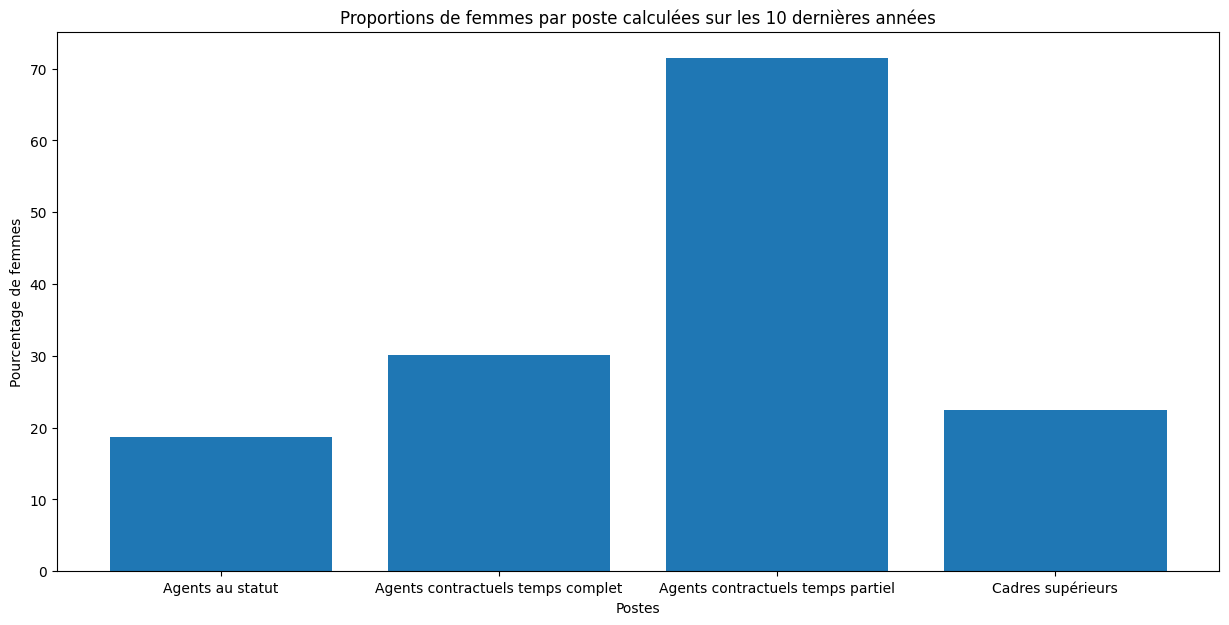

In [20]:
plt.figure(figsize=(15,7))
plt.bar(proportion_femmes_poste.index,proportion_femmes_poste)
plt.title("Proportions de femmes par poste calculées sur les 10 dernières années")
plt.xlabel("Postes")
plt.ylabel("Pourcentage de femmes")


Comme on peut le voir, en moyenne sur ces 10 dernières années, les femmes sont sous représentées dans les métiers les mieux payés (cadre supérieur et agent au statut) et surreprésentées dans les métiers les moins bien payés (agent contractuel temps partiel). 

Cependant il ne faut pas totalement être pessimiste. Essayons de représenter l'évolution de la parité homme/femme dans les postes de cadre supérieur et d'agent à temps partiel (les postes repesctivement les mieux payés et moins bien payés).

On réalise donc un groupby à multiIndex :

Text(0.5, 1.0, 'Evolution du pourcentage de femme dans différents postes')

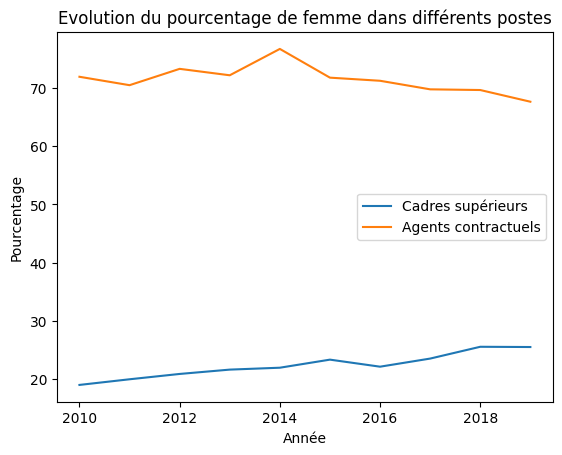

In [50]:
byposteanddate=Tn.groupby(by=["Contrat de travail","Date"])
proportion=byposteanddate["Nombre de femmes"].sum()/(byposteanddate["Nombre de femmes"].sum()+byposteanddate["Nombre d'hommes"].sum())*100
plt.figure()
plt.plot(proportion["Cadres supérieurs"].index,proportion["Cadres supérieurs"], label="Cadres supérieurs")
plt.plot(proportion["Cadres supérieurs"].index,proportion["Agents contractuels temps partiel"], label="Agents contractuels")
plt.legend()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Evolution du pourcentage de femme dans différents postes")

Comme on peut le voir on observe une mince amélioration au cours du temps, les femmes prennent une place de plus en plus importante au sein du poste de cadre supérieure, et une place de moins de moins importante au sein du poste d'agent contractuel.